<h1 align=center>数据可视化1：观测数据可视化</h1>
----
* 作者:吴立宗
* 日期：2016-7-6
* 目标：
 * matplotlib基础
 * 观测要素的可视化
 * 观测位置的可视化
 * 观测数据内部探索

In [1]:
#encoding=utf8
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
filename='data/weather_TEMP_2000.csv'

In [3]:
df=pd.read_csv(filename,sep=',',encoding='utf8',
               parse_dates={'Date':['日期']},index_col='Date')
df.head()

,区站号,纬度,经度,观测场拔海高度,平均气温,日最高气温,日最低气温,平均气温质量控制码,日最高气温质量控制码,日最低气温质量控制码
Date,,,,,,,,,,
2010-01-02,50136,52.58,122.31,4330.0,-31.4,-23.8,-36.7,0.0,0.0,0.0
2010-01-03,50136,52.58,122.31,4330.0,-28.8,-22.9,-33.2,0.0,0.0,0.0
2010-01-04,50136,52.58,122.31,4330.0,-30.9,-22.7,-36.2,0.0,0.0,0.0
2010-01-05,50136,52.58,122.31,4330.0,-21.6,-18.4,-30.7,0.0,0.0,0.0
2010-01-06,50136,52.58,122.31,4330.0,-16.8,-12.7,-20.7,0.0,0.0,0.0


### 1.绘制某一个站点的数据

In [4]:
df.dtypes

区站号             int64
纬度            float64
经度            float64
观测场拔海高度       float64
平均气温          float64
日最高气温         float64
日最低气温         float64
平均气温质量控制码     float64
日最高气温质量控制码    float64
日最低气温质量控制码    float64
dtype: object

In [4]:
df['区站号']=df['区站号'].astype(str)

In [6]:
station_id='50136'
df_new=df[df[u'区站号']==station_id]

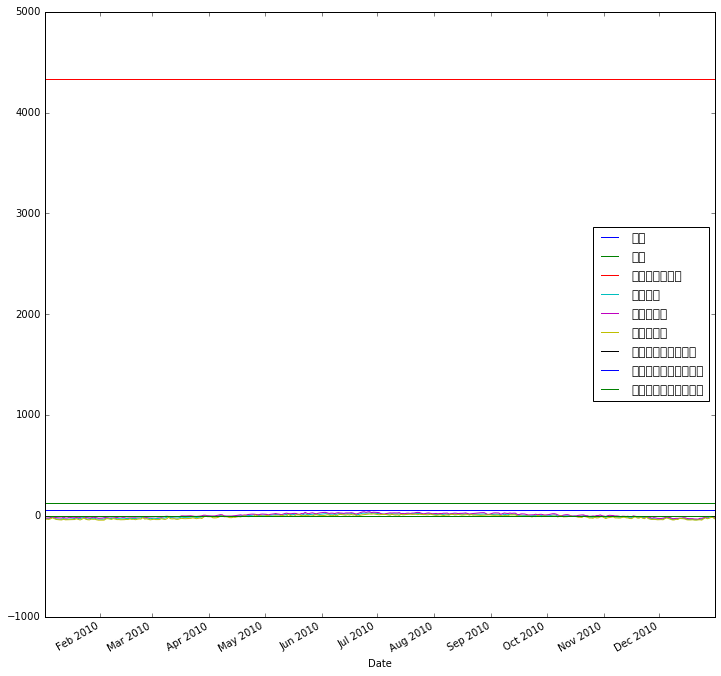

In [7]:
df_new.plot(figsize=(12,12))

* 设置绘图数据

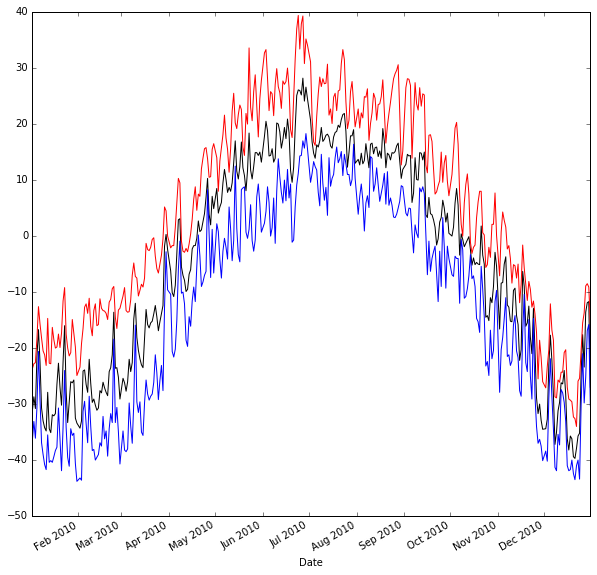

In [8]:
ax = df_new.plot(y=['平均气温'],figsize=(10,10),color='black',legend=False)
ax2 = df_new['日最高气温'].plot(ax=ax,color='red',legend=False)
ax3 = df_new['日最低气温'].plot(ax=ax,color='blue',legend=False)


* 设置标题、X轴、Y轴和图例

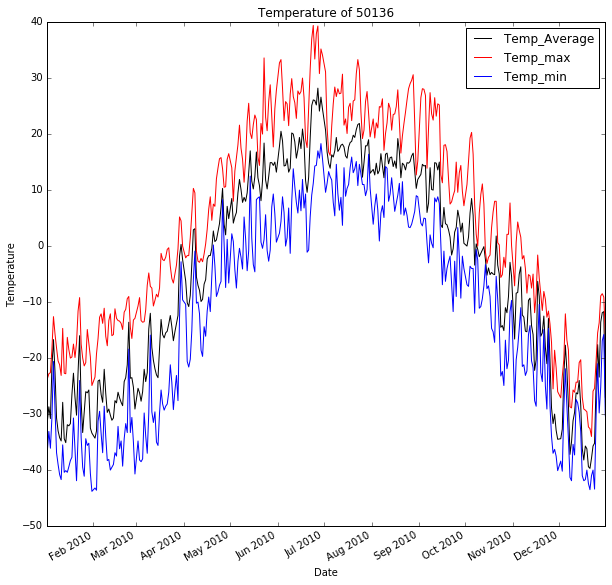

In [9]:

ax = df_new.plot(y=['平均气温'],figsize=(10,10),color='black',legend=False)
ax2 = df_new['日最高气温'].plot(ax=ax,color='red',legend=False)
ax3 = df_new['日最低气温'].plot(ax=ax,color='blue',legend=False)
ax.set_title('Temperature of 50136')
ax.set_ylabel('Temperature')
ax.legend(['Temp_Average','Temp_max','Temp_min'])

* 输出结果

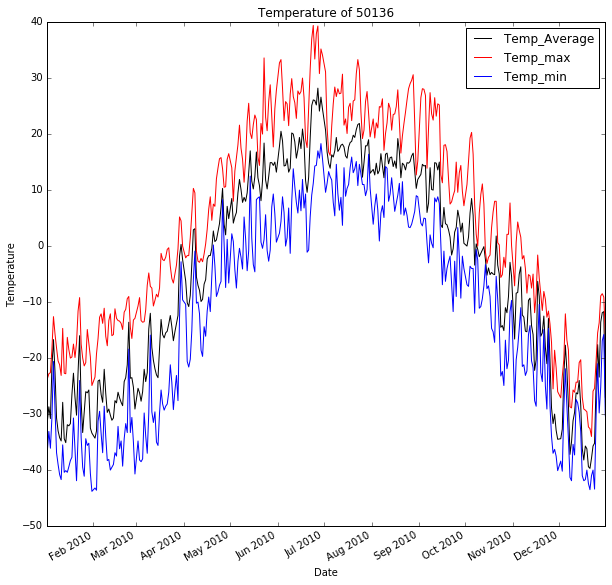

In [10]:

ax = df_new.plot(y=['平均气温'],figsize=(10,10),color='black',legend=False)
ax2 = df_new['日最高气温'].plot(ax=ax,color='red',legend=False)
ax3 = df_new['日最低气温'].plot(ax=ax,color='blue',legend=False)
ax.set_title('Temperature of 50136')
ax.set_ylabel('Temperature')
ax.legend(['Temp_Average','Temp_max','Temp_min'])
plt.savefig('c:/temp/figure.png')

## 2.中文显示问题

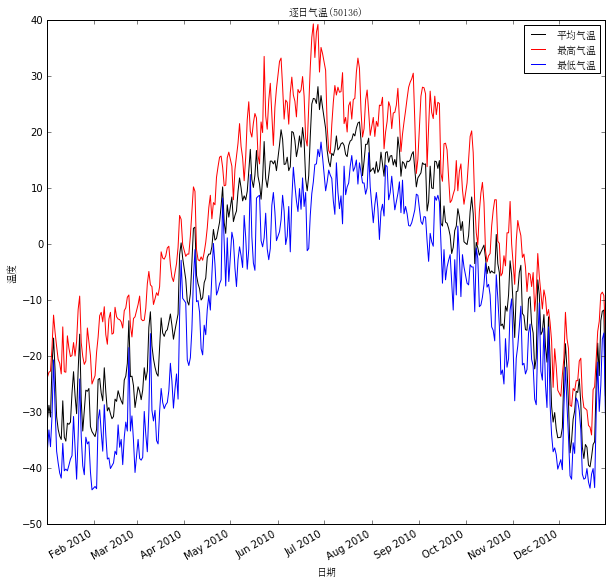

In [11]:
import matplotlib
font = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
ax = df_new.plot(y=['平均气温'],figsize=(10,10),color='black',legend=False)
ax2 = df_new['日最高气温'].plot(ax=ax,color='red',legend=False)
ax3 = df_new['日最低气温'].plot(ax=ax,color='blue',legend=False)
ax.set_title('逐日气温(50136)',fontproperties=font)
ax.set_ylabel('温度',fontproperties=font)
ax.set_xlabel('日期',fontproperties=font)
ax.legend(['平均气温','最高气温','最低气温'],prop=font)

## 3.批量输出

In [5]:
stations=df['区站号'].value_counts()

In [13]:
stations

54539    365
50656    365
53192    365
54195    365
52986    365
53487    365
53810    365
52713    365
54161    365
50514    365
51526    365
54213    365
56838    365
54662    365
54416    365
52323    365
58652    365
52118    365
56977    365
56671    365
57439    365
54333    365
52633    365
57805    365
58918    365
51711    365
51633    365
56444    365
53955    365
59082    365
        ... 
58715    365
54535    365
54260    365
58026    365
57758    365
50834    365
53594    365
59658    365
58665    365
53884    365
58251    365
57806    365
51828    365
57799    365
57774    365
50854    365
56763    365
56151    365
57839    365
54823    365
57127    365
58927    365
54916    365
57237    365
56021    365
51747    365
57378    365
50774    365
58027    365
50136    353
Name: 区站号, dtype: int64

In [9]:
%matplotlib auto
import matplotlib
import os
out_path='C:/temp/station_new/'
font = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
index=0
for station in stations.index:
    df_new=df[df['区站号']==station]

    ax = df_new.plot(y=['平均气温'],figsize=(10,10),color='black',legend=False)
    ax2 = df_new['日最高气温'].plot(ax=ax,color='red',legend=False)
    ax3 = df_new['日最低气温'].plot(ax=ax,color='blue',legend=False)
    ax.set_title('逐日气温(50136)',fontproperties=font)
    ax.set_ylabel('温度',fontproperties=font)
    ax.set_xlabel('日期',fontproperties=font)
    ax.legend(['平均气温','最高气温','最低气温'],prop=font)
    outfile=os.path.join(out_path,station+'.png')
    plt.savefig(outfile,format='png')
    plt.close()

    

Using matplotlib backend: Qt4Agg
